<a href="https://colab.research.google.com/github/sivapriya-yuga/sivapriya-yuga/blob/main/Project_Sentimental_Analysis_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string

In [ ]:
sample="I am Learning Python and DataScience from RIT,I also learn Machine Learning and Deep LEarning :))!!!"
sample_punc_removed=[char for char in sample if char not in string.punctuation]
sample_punc_removed

TO join the characters

In [4]:
sample_punc_removed_join=''.join(sample_punc_removed)
sample_punc_removed_join

'I am Learning Python and DataScience from RITI also learn Machine Learning and Deep LEarning '

To Remove stop words import Stopwords

In [5]:
import nltk

In [6]:
from nltk.corpus import stopwords


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
sample_punc_removed_join_clean=[words for words in sample_punc_removed_join.split() if words.lower() not in stopwords.words("english")]
sample_punc_removed_join_clean

['Learning',
 'Python',
 'DataScience',
 'RITI',
 'also',
 'learn',
 'Machine',
 'Learning',
 'Deep',
 'LEarning']

Perfrom Counter Vectorization

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
sampledata=["This is a cat.","This is one Dog!","This is a tree","This is an apple"]
counter_vector=CountVectorizer()
X=counter_vector.fit_transform(sampledata)
X=X.toarray()

In [11]:
import pandas as pd
df=pd.DataFrame(data=X,columns=counter_vector.get_feature_names_out())
df

,an,apple,cat,dog,is,one,this,tree
0,0,0,1,0,1,0,1,0
1,0,0,0,1,1,1,1,0
2,0,0,0,0,1,0,1,1
3,1,1,0,0,1,0,1,0


In [12]:
text=["My name is Priya!!","I am learning Datascience","Datascience is good"]
text_counter=CountVectorizer()
text_matrix=text_counter.fit_transform(text)
text_array=text_matrix.toarray()
df=pd.DataFrame(data=text_array,columns=text_counter.get_feature_names_out())

In [13]:
df

,am,datascience,good,is,learning,my,name,priya
0,0,0,0,1,0,1,1,1
1,1,1,0,0,1,0,0,0
2,0,1,1,1,0,0,0,0


Sentimental Analysis using twitter Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
from google.colab import files
df=files.upload()

Saving twitter.csv.zip to twitter.csv (1).zip


In [8]:
import nltk

In [9]:
df=pd.read_csv("twitter.csv.zip")

In [10]:
df_twitter=df.copy()

In [11]:
df_twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [13]:
df_twitter.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [14]:
df_twitter=df_twitter.drop("id",axis=1)

In [15]:
df_twitter

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [16]:
df_twitter["Length"]=df_twitter["tweet"].apply(len)
df_twitter.head()

,label,tweet,Length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [17]:
df_twitter.describe()

,label,Length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [18]:
df_twitter[df_twitter["Length"]==11]['tweet'].iloc[0:]

25195    i love you 
Name: tweet, dtype: object

In [19]:
df_twitter[df_twitter['Length']==274]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [20]:
positive=df_twitter[df_twitter["label"]==0]
positive

,label,tweet,Length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [21]:
negative=df_twitter[df_twitter["label"]==1]
negative

,label,tweet,Length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


Removing Punctuation

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
def cleaning(message):
 twitter_punc_removed=[char for char in message if char not in string.punctuation]
 twitter_punc_join=''.join(twitter_punc_removed)
 twitter_punc_clean=[word for word in twitter_punc_join.split() if word.lower() not in stopwords.words('english')]
 return twitter_punc_clean


In [25]:
tweets_df_clean=df_twitter['tweet'].apply(cleaning)
tweets_df_clean.head()

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, lyft, credit, cant, use, ...
2                                    [bihday, majesty]
3    [model, love, u, take, u, time, urð±, ðð...
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

In [28]:
print(df_twitter['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer=cleaning,dtype=np.uint8)
tweets_countervectorizer=vectorizer.fit_transform(df_twitter["tweet"])

In [27]:
tweets=pd.DataFrame(tweets_countervectorizer.toarray())

In [28]:
X=tweets

In [29]:
y=df_twitter["label"]
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

TRAINING THE DATA USING NAIVE BAYES THEOREM

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

<Axes: >

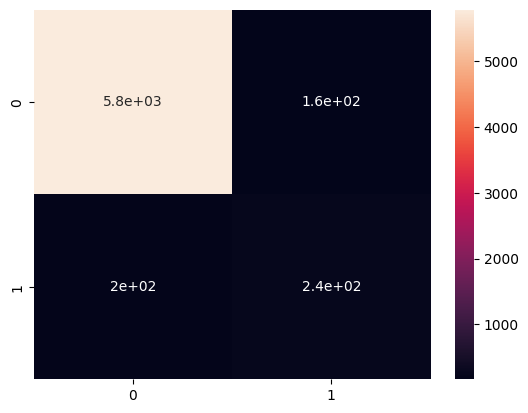

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict_test= NB_classifier.predict(X_test[0:6393])
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [34]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5949
           1       0.60      0.54      0.57       444

    accuracy                           0.94      6393
   macro avg       0.78      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

